In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.utils import load_img
import matplotlib.pyplot as plt
from IPython.display import HTML
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from PIL import Image
import scipy

In [39]:
#befor next cell run
#cmd >> python
#import splitfolders
#splitfolders.ratio("datasets", output="datasets_alt",seed=1337, ratio=(.7, .1, .2), group_prefix=None, move=False)

In [2]:
IMAGE_SIZE = 256
CHANNELS = 3
train_datagen=ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)
train_generator=train_datagen.flow_from_directory(
    'datasets_alt/train',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse'
)

Found 1007 images belonging to 2 classes.


In [3]:
for image_batch, label_batch in train_generator:
    print(image_batch.shape)
    break

(32, 256, 256, 3)


In [4]:
validation_datagen=ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)
validation_generator=validation_datagen.flow_from_directory(
    'datasets_alt/val',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse'
)

Found 143 images belonging to 2 classes.


In [5]:
test_datagen=ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)
test_generator=test_datagen.flow_from_directory(
    'datasets_alt/test',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse'
)

Found 290 images belonging to 2 classes.


In [6]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes=2

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [8]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [9]:
143/32

4.46875

In [10]:
history=model.fit(
    train_generator,
    steps_per_epoch=31,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=4,
    verbose=1,
    epochs=20
)

Epoch 1/20
31/31 [==============================] - 109s 4s/step - loss: 0.6892 - accuracy: 0.5097 - val_loss: 0.6774 - val_accuracy: 0.4844
Epoch 2/20
31/31 [==============================] - 100s 3s/step - loss: 0.5637 - accuracy: 0.6903 - val_loss: 0.4919 - val_accuracy: 0.7500
Epoch 3/20
31/31 [==============================] - 105s 3s/step - loss: 0.4198 - accuracy: 0.8103 - val_loss: 0.4767 - val_accuracy: 0.8125
Epoch 4/20
31/31 [==============================] - 98s 3s/step - loss: 0.3820 - accuracy: 0.8523 - val_loss: 0.3094 - val_accuracy: 0.8750
Epoch 5/20
31/31 [==============================] - 98s 3s/step - loss: 0.3108 - accuracy: 0.8790 - val_loss: 0.3301 - val_accuracy: 0.8516
Epoch 6/20
31/31 [==============================] - 97s 3s/step - loss: 0.3099 - accuracy: 0.8810 - val_loss: 0.2651 - val_accuracy: 0.8984
Epoch 7/20
31/31 [==============================] - 96s 3s/step - loss: 0.2913 - accuracy: 0.9005 - val_loss: 0.2632 - val_accuracy: 0.8906
Epoch 8/20
31/31 

In [11]:
scores=model.evaluate(test_generator)
scores

10/10 [==============================] - 24s 2s/step - loss: 0.3725 - accuracy: 0.8897


[0.3724784851074219, 0.8896551728248596]

In [12]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 31}

In [13]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [14]:
len(history.history)

4

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

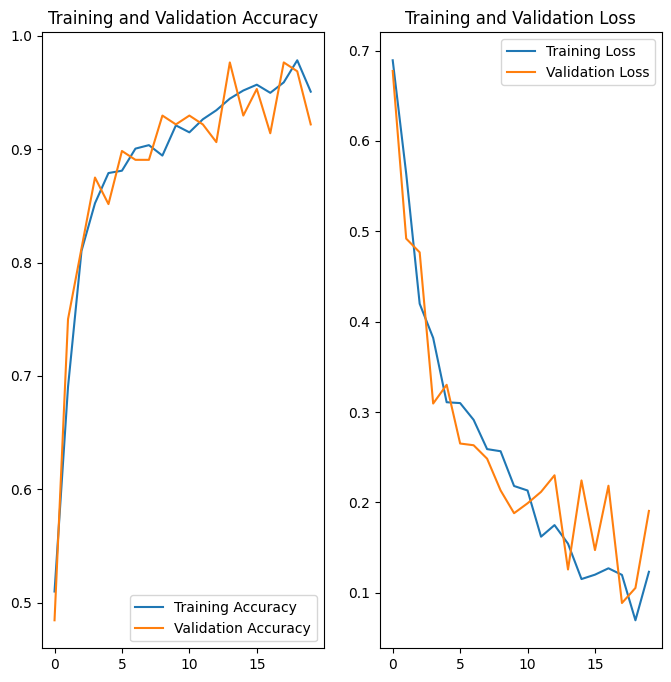

In [16]:
EPOCHS=20
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
class_names = list(train_generator.class_indices.keys())
class_names

['clean', 'dirty']

first image to predict
actual label: dirty
1/1 [==============================] - 0s 283ms/step
predicted label: dirty


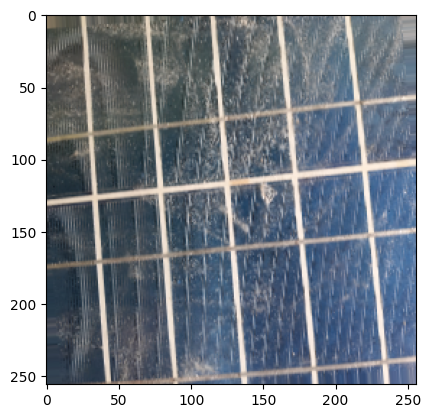

In [18]:
import numpy as np
for images_batch, labels_batch in test_generator:
    
    first_image = images_batch[0]
    first_label = int(labels_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [20]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 26ms/step


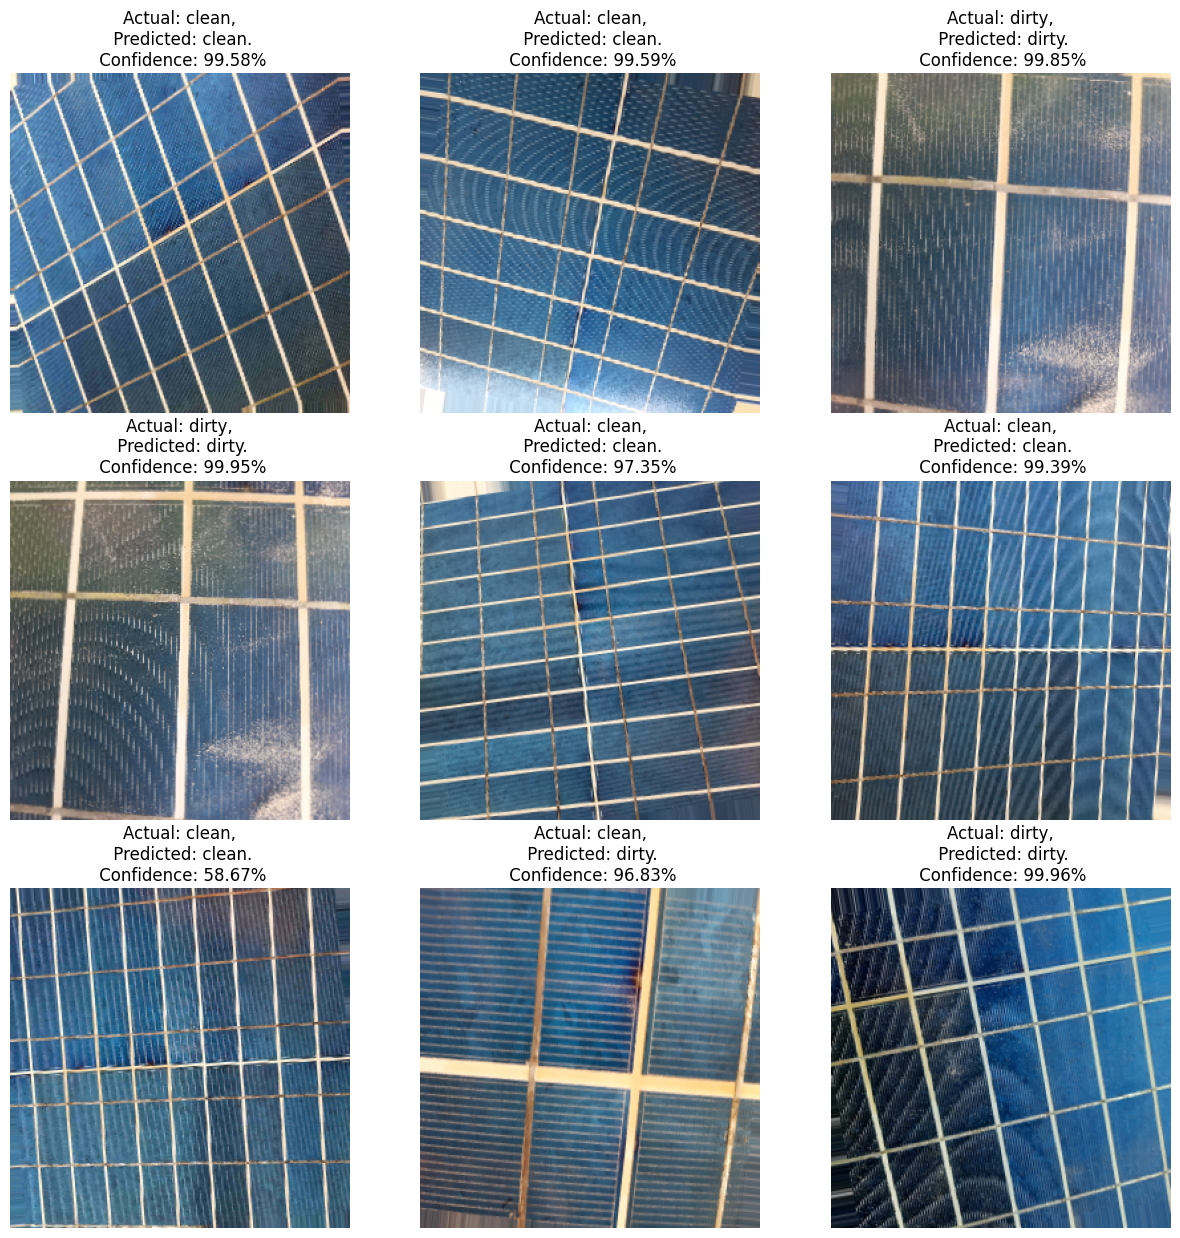

In [21]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [24]:
import os
model_version=max([int(i) for i in os.listdir("../save_solar_models") + [0]])+1
model.save(f"../save_solar_models/{model_version}")

INFO:tensorflow:Assets written to: ../save_solar_models/1\assets


INFO:tensorflow:Assets written to: ../save_solar_models/1\assets


In [25]:
model.save("../solar.h5")